In [90]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [102]:
from math import log
from scipy import stats
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split

In [3]:
%%capture
! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

lm = LinearRegression()
lm

In [4]:
filname=r'C:\Users\user\Desktop\arvind\Machine learning\Kaggle\house-prices-advanced-regression-techniques\train.csv'

In [5]:
df = pd.read_csv(filname)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
original_df=df
df.shape

(1460, 81)

Identify the null and empty data.

In [7]:
#print(df['MiscFeature'].isnull()==False)
print(df[df['MiscFeature'].notnull()])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
84      85          80       RL          NaN     8530   Pave   NaN      IR1   
95      96          60       RL          NaN     9765   Pave   NaN      IR2   
98      99          30       RL         85.0    10625   Pave   NaN      Reg   
99     100          20       RL         77.0     9320   Pave   NaN      IR1   
106    107          30       RM         60.0    10800   Pave  Grvl      Reg   
214    215          60       RL          NaN    10900   Pave   NaN      IR1   
249    250          50       RL          NaN   15900

In [8]:
#Lets replace missing data with NaN
df.replace("?", np.nan, inplace = True)

In [9]:
#Function to display the missing data.
def printnull(df):
    missing_data = df.isnull()
    list_of_nulls_cols = []
    for column in missing_data.columns.values.tolist():
        if(str(len(df)) not in missing_data[column].value_counts().to_string()):
            print(column," ",df.dtypes[column]," ",missing_data[column].value_counts().to_string().replace("\n","   "),"\n")
            list_of_nulls_cols.append(column)
    print(list_of_nulls_cols)

<b>Find the similar occurance count for each missing data.</b>

In [10]:
printnull(df)

LotFrontage   float64   False    1201   True      259 

Alley   object   True     1369   False      91 

MasVnrType   object   False    1452   True        8 

MasVnrArea   float64   False    1452   True        8 

BsmtQual   object   False    1423   True       37 

BsmtCond   object   False    1423   True       37 

BsmtExposure   object   False    1422   True       38 

BsmtFinType1   object   False    1423   True       37 

BsmtFinType2   object   False    1422   True       38 

Electrical   object   False    1459   True        1 

FireplaceQu   object   False    770   True     690 

GarageType   object   False    1379   True       81 

GarageYrBlt   float64   False    1379   True       81 

GarageFinish   object   False    1379   True       81 

GarageQual   object   False    1379   True       81 

GarageCond   object   False    1379   True       81 

PoolQC   object   True     1453   False       7 

Fence   object   True     1179   False     281 

MiscFeature   object   True     14

In [11]:
print(df['Alley'].value_counts(),"\n")
print(df['MasVnrType'].value_counts(),"\n")
print(df['BsmtQual'].value_counts(),"\n")
print(df['BsmtCond'].value_counts(),"\n")
print(df['BsmtExposure'].value_counts(),"\n")
print(df['BsmtFinType1'].value_counts(),"\n")
print(df['BsmtFinType2'].value_counts(),"\n")
print(df['Electrical'].value_counts(),"\n")
print(df['FireplaceQu'].value_counts(),"\n")
print(df['GarageType'].value_counts(),"\n")
print(df['GarageFinish'].value_counts(),"\n")
print(df['GarageQual'].value_counts(),"\n")
print(df['GarageCond'].value_counts(),"\n")
print(df['PoolQC'].value_counts(),"\n")
print(df['Fence'].value_counts(),"\n")
print(df['MiscFeature'].value_counts(),"\n")
## below is for number   
print(df['GarageYrBlt'].value_counts(),"\n")
print(df['LotFrontage'].value_counts(),"\n")
print(df['GarageYrBlt'].value_counts(),"\n")

Grvl    50
Pave    41
Name: Alley, dtype: int64 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

TA    1311
Fa      48
Gd      14
Po       3
Ex    

LotFrontage  -> replace with the mean approach
MasVnrArea   -> Replace by frequency approach:-> as most number is 0
Electrical   -> Replace by frequency approach:-> as most occurance is for Attchd
GarageYrBlt  -> missing data sugnify no garage so will put 0 
Alley        -> as per description NA mean no allay so will make is NoAl: No Alley 
MasVnrType   -> Replace by frequency approach:-> as most occurance is None
BsmtQual     -> As per description NA means no basement so will make is NoBS: No Basement 
BsmtCond     -> As per description NA means no basement so will make is NoBS: No Basement 
BsmtExposure -> As per description NA means no basement so will make is NoBS: No Basement
BsmtFinType1 -> As per description NA means no basement so will make is NoBS: No Basement
BsmtFinType2 -> As per description NA means no basement so will make is NoBS: No Basement
GarageType   -> As per description NA means no basement so will make is NoGR: No Garage 
GarageFinish -> As per description NA means no basement so will make is NoGR: No Garage
GarageQual   -> As per description NA means no basement so will make is NoGR: No Garage 
GarageCond   -> As per description NA means no basement so will make is NoGR: No Garage
FireplaceQu  -> As per description NA means no Fireplace so will make is NoFP: No Fireplace
PoolQC       -> As per description NA means no Pool so will make is NoPL: No pool
Fence        -> As per description NA means no Pool so will make is NoFN: No Fence
MiscFeature  -> As per description NA means no additional feature so will make is NoMN: No MiscFeature

In [12]:
#Lets replace the data as per above description
df["LotFrontage"].replace(np.nan,df['LotFrontage'].astype('float').mean(axis=0),inplace=True)  
df["MasVnrArea"].replace(np.nan,df['MasVnrArea'].value_counts().idxmax(),inplace=True)  
df["Electrical"].replace(np.nan,df['Electrical'].value_counts().idxmax(),inplace=True)  

df["GarageYrBlt"].replace(np.nan,0,inplace=True)  
df["Alley"].replace(np.nan,'NoAL',inplace=True)  
df["MasVnrType"].replace(np.nan,df['MasVnrType'].value_counts().idxmax(),inplace=True)
df["BsmtQual"].replace(np.nan,'NoBS',inplace=True)  
df["BsmtCond"].replace(np.nan,'NoBS',inplace=True)  
df["BsmtExposure"].replace(np.nan,'NoBS',inplace=True)  
df["BsmtFinType1"].replace(np.nan,'NoBS',inplace=True)  
df["BsmtFinType2"].replace(np.nan,'NoBS',inplace=True)  
df["GarageType"].replace(np.nan,'NoGR',inplace=True)  
df["GarageFinish"].replace(np.nan,'NoGR',inplace=True)  
df["GarageQual"].replace(np.nan,'NoGR',inplace=True)  
df["GarageCond"].replace(np.nan,'NoGR',inplace=True)  
df["FireplaceQu"].replace(np.nan,'NoFP',inplace=True)  
df["PoolQC"].replace(np.nan,'NoPL',inplace=True)  
df["Fence"].replace(np.nan,'NoFN',inplace=True)  
df["MiscFeature"].replace(np.nan,'NoMF',inplace=True)  



In [13]:
printnull(df)

[]


In [14]:
#pd.options.display.max_rows = 400
print(df.dtypes)
pd.options.display.max_rows = 20

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [15]:
#Change data type for column MasVnrArea and LotFrontage from float to int
df[["MasVnrArea"]] = df[["MasVnrArea"]].astype("int")
df[["LotFrontage"]] = df[["LotFrontage"]].astype("int")
#pd.options.display.max_rows = 400
print(df.dtypes)
pd.options.display.max_rows = 20

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage       int32
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object


</B><U>Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.</b></U>

In [16]:
print(df["MasVnrType"])
print(df.dtypes)
print(df.describe())
print(df.describe(include='all'))
print(df.describe(include=['object']))
print(df.isnull().sum().sum())
X = df[['LotArea']]
Y = df['SalePrice']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5] 

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object
Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage       int32
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.041096   10516.828082     6.099315   
std     421.610009    42.300571    22.024031    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000 

array([176580.91488881, 178995.88263327, 182460.83635359, 178890.88403568,
       188781.75192823])

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
df.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NoAL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NoPL,NoFN,NoMF,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


Lets try to find out <b> relationship among the column for Int dataypes</b>.

The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
1:  Total positive linear correlation.
0:  No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.

In [19]:
#Show pearson correlationship
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

df.corr()
#pd.options.display.max_rows = 25

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009616,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.013491,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357042,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009616,-0.357042,1.000000,0.306689,0.234227,-0.052842,0.117555,0.082775,0.178690,0.215760,0.043298,0.122249,0.363366,0.414246,0.072479,0.036879,0.368376,0.091428,-0.006446,0.180431,0.048209,0.237016,-0.005762,0.320166,0.235636,0.100210,0.269722,0.323658,0.077032,0.137435,0.009814,0.062317,0.037683,0.180867,0.001101,0.010172,0.006750,0.334897
LotArea,-0.033226,-0.139781,0.306689,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234227,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052842,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117555,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082775,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178690,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.215760,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [20]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('SalePrice')
    plt.ylabel('Proportion of house')
    plt.show()
    plt.close()

In [21]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [22]:
def plotlineargraph(numbercolumnlist,graphrow,df):
    
    fig, ax = plt.subplots(graphrow,6, figsize = (20,20))
    print(type(ax))
 
    for idx, n in enumerate(numbercolumnlist):
        #print(idx,":::",idx//6,idx,":::",idx%6)
        if n == 'SalePrice':
            continue
        sns.regplot(x=n, y='SalePrice', data=df, ax = ax[idx//6,idx%6])
        ax[idx//6, idx % 6].set(yticklabels=[])
        ax[idx//6, idx % 6].set(xticklabels=[])
        continue 

In [23]:
def plotboxploat(grouped_pivot):
    fig, ax = plt.subplots()
    im = ax.pcolor(grouped_pivot, cmap='RdBu')
#label names
    row_labels = grouped_pivot.columns.levels[1]
    col_labels = grouped_pivot.index
#move ticks and labels to the center
    ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
#insert labels
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
    plt.xticks(rotation=90)
    fig.colorbar(im)
    plt.show()

In [24]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('SalePrice of House')

    plt.show()
    plt.close()

In [25]:
numbercolumnlist=[]
objectcolumnlist=[]
for rws in df.columns:
    if df[rws].dtype=='object':
        objectcolumnlist.append(rws)
    else:
        numbercolumnlist.append(rws)
    #print(df[rws].dtype)
print("numbercolumnlist",numbercolumnlist)
print("objectcolumnlist",objectcolumnlist)
numbercolumnlist.remove('Id')
numbercolumnlist.remove('SalePrice')
print(len(numbercolumnlist))

numbercolumnlist ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
objectcolumnlist ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', '

<class 'numpy.ndarray'>


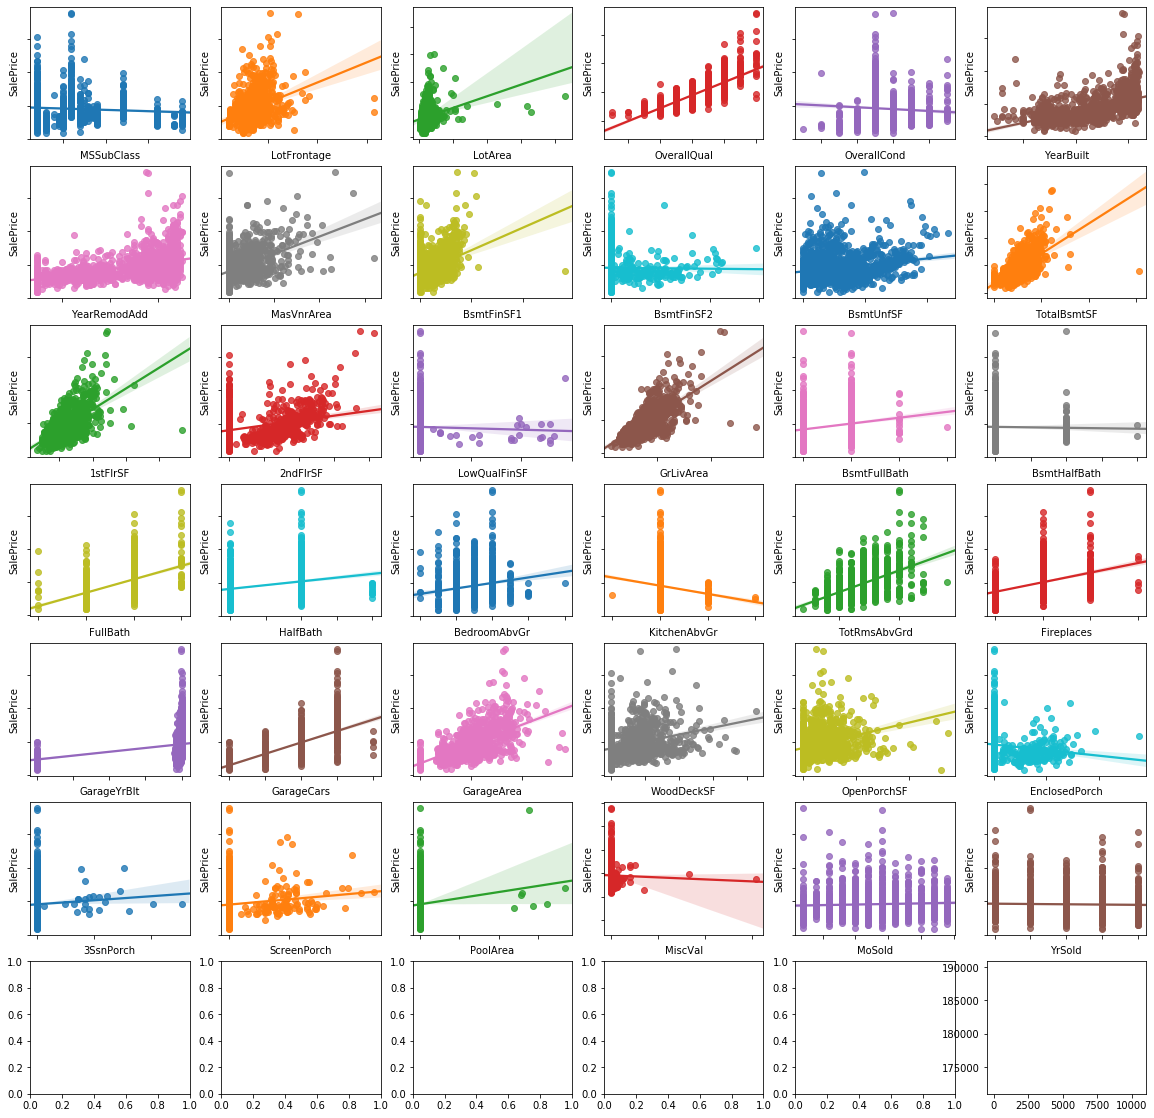

In [26]:
plotlineargraph(numbercolumnlist,7,df)

In [27]:
from operator import itemgetter

correlation_dict={}
for clnname in df.columns:
    if df[clnname].dtype=='int64':
        correlation_dict[clnname]=df[[clnname,'SalePrice']].corr().iloc[0,1]
        
sort_list=sorted(correlation_dict.items(), key=itemgetter(1))
for k,v in sort_list:
    print("Correlation of Salesprice with  ",k," ",v)

Correlation of Salesprice with   KitchenAbvGr   -0.1359073708421417
Correlation of Salesprice with   EnclosedPorch   -0.12857795792595636
Correlation of Salesprice with   MSSubClass   -0.08428413512659523
Correlation of Salesprice with   OverallCond   -0.0778558940486776
Correlation of Salesprice with   YrSold   -0.028922585168730426
Correlation of Salesprice with   LowQualFinSF   -0.02560613000068015
Correlation of Salesprice with   Id   -0.021916719443431112
Correlation of Salesprice with   MiscVal   -0.02118957964030379
Correlation of Salesprice with   BsmtHalfBath   -0.016844154297359294
Correlation of Salesprice with   BsmtFinSF2   -0.011378121450215216
Correlation of Salesprice with   3SsnPorch   0.04458366533574792
Correlation of Salesprice with   MoSold   0.04643224522381936
Correlation of Salesprice with   PoolArea   0.09240354949187278
Correlation of Salesprice with   ScreenPorch   0.11144657114291048
Correlation of Salesprice with   BedroomAbvGr   0.1682131543007415
Correlat

Using above output we can say there is no negative relationship variable present. 
YearBuilt,TotRmsAbvGrd   ,FullBath ,1stFlrSF,TotalBsmtSF ,GarageArea  ,GarageCars ,GrLivArea and OverallQual  have +ve relationship with the sales price.

Lets use p-value(he P-value is the probability value that the correlation between these two variables is statistically significant.) to confirm the correlation between the variables.
p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
the p-value is  <  0.1: there is weak evidence that the correlation is significant.
the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [28]:
positive_relationship=['BedroomAbvGr','BsmtUnfSF','BsmtFullBath','LotArea','HalfBath','OpenPorchSF','2ndFlrSF','WoodDeckSF','BsmtFinSF1','Fireplaces','YearRemodAdd','YearBuilt','TotRmsAbvGrd','FullBath','1stFlrSF','TotalBsmtSF','GarageArea','GarageCars','GrLivArea','OverallQual']
for clnname in positive_relationship:
    pearson_coef, p_value = stats.pearsonr(df[clnname],df['SalePrice'])
    print("Pearson Correlation Coefficient ",clnname," ", pearson_coef, " with a P-value =", p_value)

Pearson Correlation Coefficient  BedroomAbvGr   0.16821315430073996  with a P-value = 9.927497326187329e-11
Pearson Correlation Coefficient  BsmtUnfSF   0.21447910554696892  with a P-value = 1.1829757963600795e-16
Pearson Correlation Coefficient  BsmtFullBath   0.22712223313149424  with a P-value = 1.550344137214128e-18
Pearson Correlation Coefficient  LotArea   0.2638433538714057  with a P-value = 1.1231391549193063e-24
Pearson Correlation Coefficient  HalfBath   0.28410767559478256  with a P-value = 1.6504733955727557e-28
Pearson Correlation Coefficient  OpenPorchSF   0.3158562271160553  with a P-value = 3.493373623097777e-35
Pearson Correlation Coefficient  2ndFlrSF   0.3193338028320678  with a P-value = 5.764335119183061e-36
Pearson Correlation Coefficient  WoodDeckSF   0.3244134445681299  with a P-value = 3.972216535629994e-37
Pearson Correlation Coefficient  BsmtFinSF1   0.38641980624215333  with a P-value = 3.3941098292907553e-53
Pearson Correlation Coefficient  Fireplaces   0.4

<class 'numpy.ndarray'>


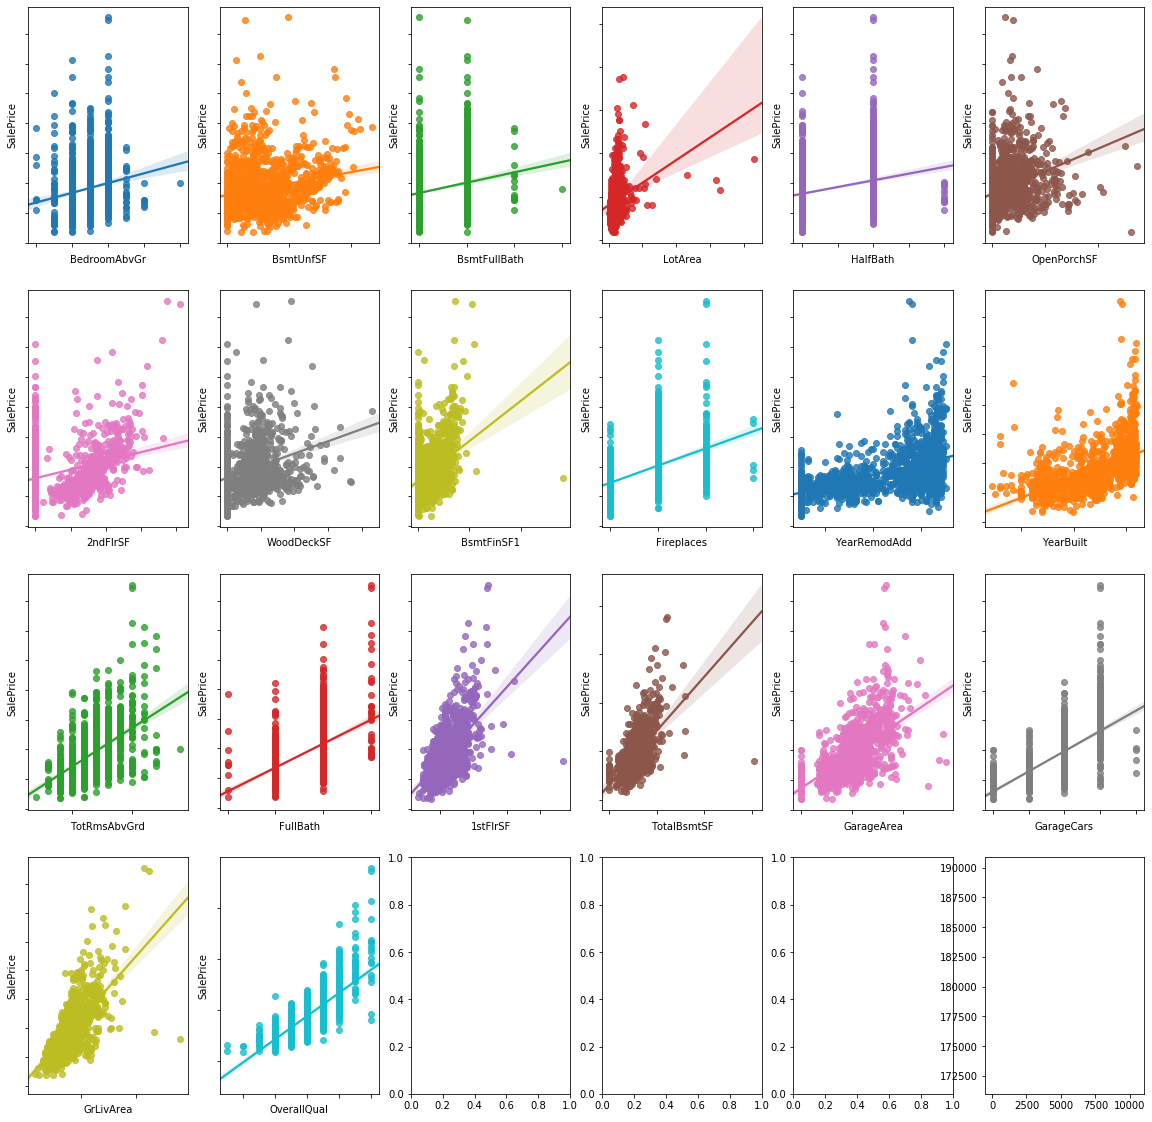

In [29]:
plotlineargraph(positive_relationship,4,df)

Let's normalize overallQual, GarageCars, FullBath,TotRmnsAbvGrd, Fireplaces,HalfBath. 

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [30]:
'''
df['OverallQual'] = df['OverallQual']/df['OverallQual'].max()
df['GarageCars'] = df['GarageCars']/df['GarageCars'].max()
df['FullBath'] = df['FullBath']/df['FullBath'].max()
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd']/df['TotRmsAbvGrd'].max()
df['Fireplaces'] = df['Fireplaces']/df['Fireplaces'].max()
df['HalfBath'] = df['HalfBath']/df['HalfBath'].max()

plotlineargraph(positive_relationship,4,df)
'''


"\ndf['OverallQual'] = df['OverallQual']/df['OverallQual'].max()\ndf['GarageCars'] = df['GarageCars']/df['GarageCars'].max()\ndf['FullBath'] = df['FullBath']/df['FullBath'].max()\ndf['TotRmsAbvGrd'] = df['TotRmsAbvGrd']/df['TotRmsAbvGrd'].max()\ndf['Fireplaces'] = df['Fireplaces']/df['Fireplaces'].max()\ndf['HalfBath'] = df['HalfBath']/df['HalfBath'].max()\n\nplotlineargraph(positive_relationship,4,df)\n"

49


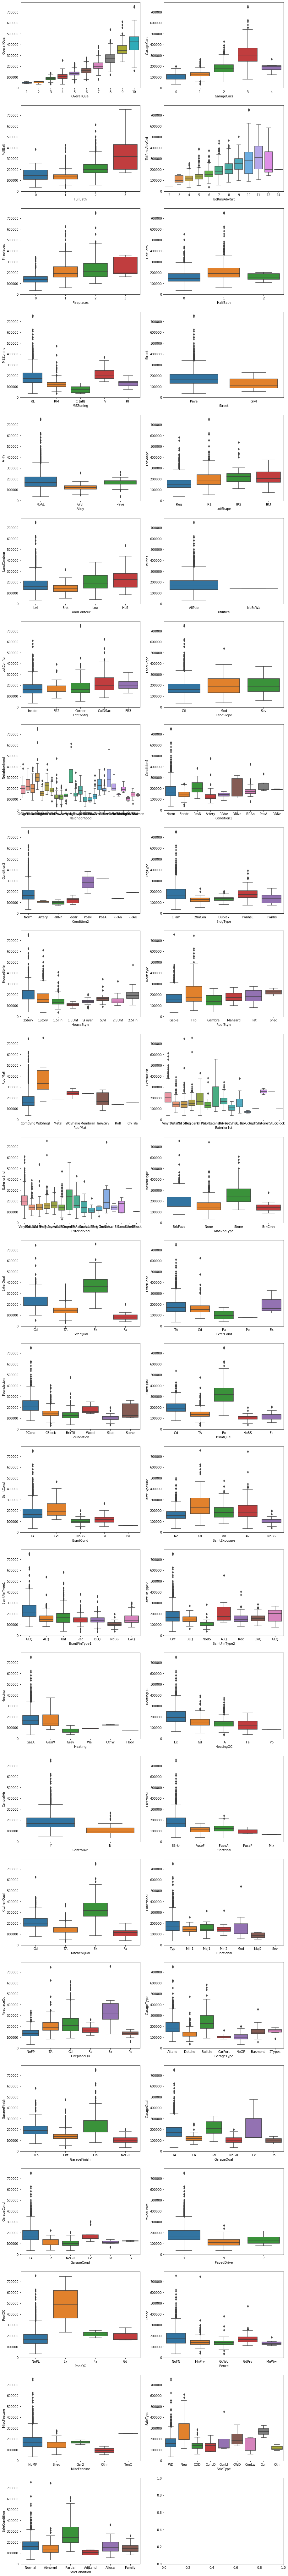

In [31]:
# Lets plot box plot to visualize categorical data.
tmp=['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','Fireplaces','HalfBath']+objectcolumnlist 
print(len(tmp))
if(len(tmp)%2==0):
    numofrowstobedisplayed=len(tmp)
else:
    numofrowstobedisplayed=len(tmp)+1

fig, ax = plt.subplots(int((numofrowstobedisplayed/2)),2, figsize = (15,150))

for idx, n in enumerate(tmp):
    
    sns.boxplot(x=n, y='SalePrice',data=df, ax = ax[idx//2, idx % 2])
    ax[idx//2, idx % 2].set(ylabel=n)    
    continue 

<b>Will use below Categorical Column qaulify further</b>

OverallQual  GarageCars  FullBath  TotRmsAbvGrd  MSZoning  Neighborhood  Condition  HouseStyle  ExterQual  BsmtQual  BsmntCond  KitchenQual  GarageType  GarageFinish  PoolQC

<b>Will use below numerical Column qaulify further</b>

GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  YearBuilt  BsmtFinSF1  WoodDeckSF  2ndFlrSF  OpenPorchSF  LotArea  BsmtUnfSF

In [32]:
#df['GarageCars'].value_counts()

   OverallQual      SalePrice
0            1   50150.000000
1            2   51770.333333
2            3   87473.750000
3            4  108420.655172
4            5  133523.347607
5            6  161603.034759
6            7  207716.423197
7            8  274735.535714
8            9  367513.023256
9           10  438588.388889 



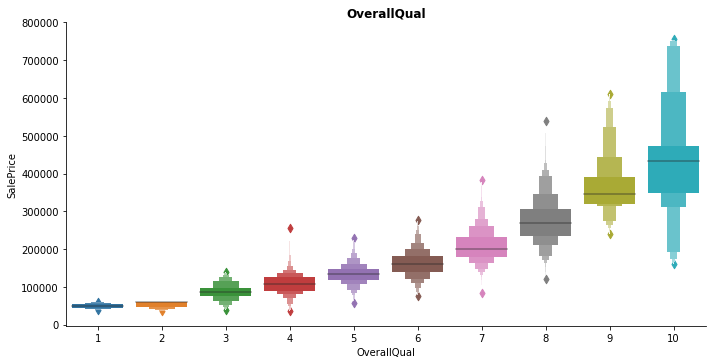

   GarageCars      SalePrice
0           0  103317.283951
1           1  128116.688347
2           2  183851.663835
3           3  309636.121547
4           4  192655.800000 



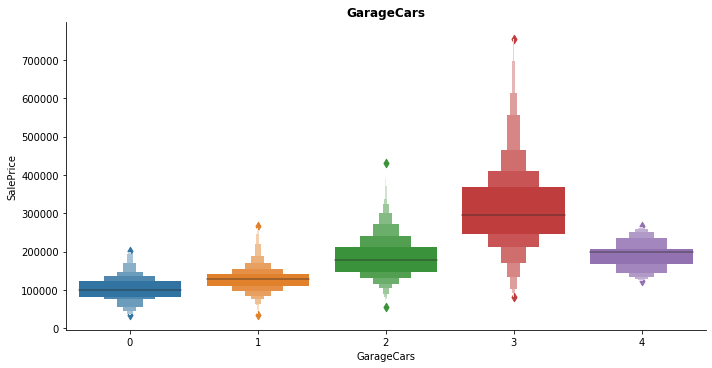

   FullBath      SalePrice
0         0  165200.888889
1         1  134751.440000
2         2  213009.825521
3         3  347822.909091 



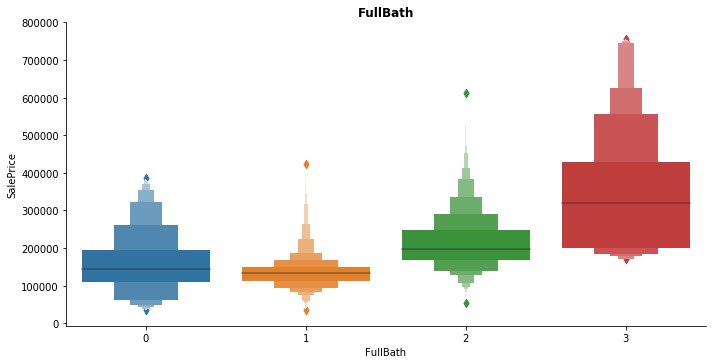

    TotRmsAbvGrd      SalePrice
0              2   39300.000000
1              3  111217.647059
2              4  122844.628866
3              5  141550.749091
4              6  161303.296020
5              7  196666.784195
6              8  213427.529412
7              9  252988.173333
8             10  296279.170213
9             11  318022.000000
10            12  280971.454545
11            14  200000.000000 



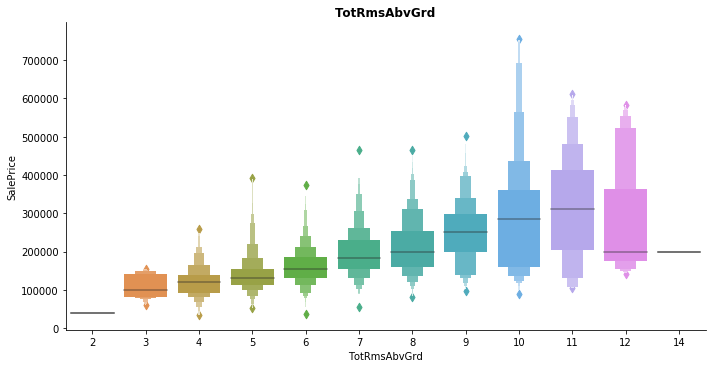

  MSZoning      SalePrice
0  C (all)   74528.000000
1       FV  214014.061538
2       RH  131558.375000
3       RL  191004.994787
4       RM  126316.830275 



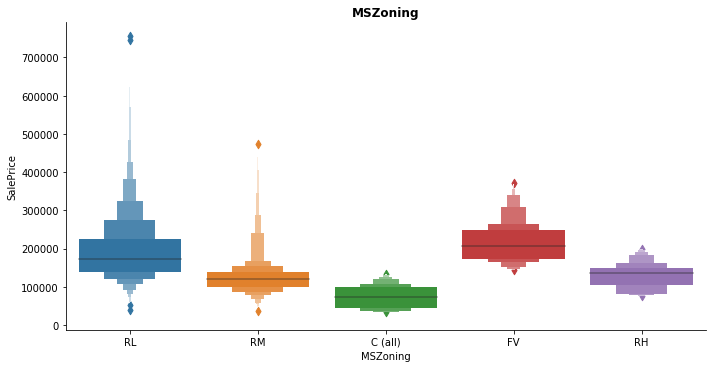

   Neighborhood      SalePrice
0       Blmngtn  194870.882353
1       Blueste  137500.000000
2        BrDale  104493.750000
3       BrkSide  124834.051724
4       ClearCr  212565.428571
5       CollgCr  197965.773333
6       Crawfor  210624.725490
7       Edwards  128219.700000
8       Gilbert  192854.506329
9        IDOTRR  100123.783784
10      MeadowV   98576.470588
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
14       NWAmes  189050.068493
15      NoRidge  335295.317073
16      NridgHt  316270.623377
17      OldTown  128225.300885
18        SWISU  142591.360000
19       Sawyer  136793.135135
20      SawyerW  186555.796610
21      Somerst  225379.837209
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273 



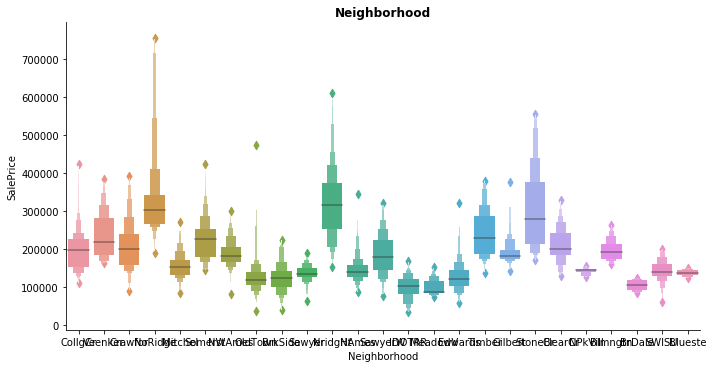

  Condition1      SalePrice
0     Artery  135091.666667
1      Feedr  142475.481481
2       Norm  184495.492063
3       PosA  225875.000000
4       PosN  215184.210526
5       RRAe  138400.000000
6       RRAn  184396.615385
7       RRNe  190750.000000
8       RRNn  212400.000000 



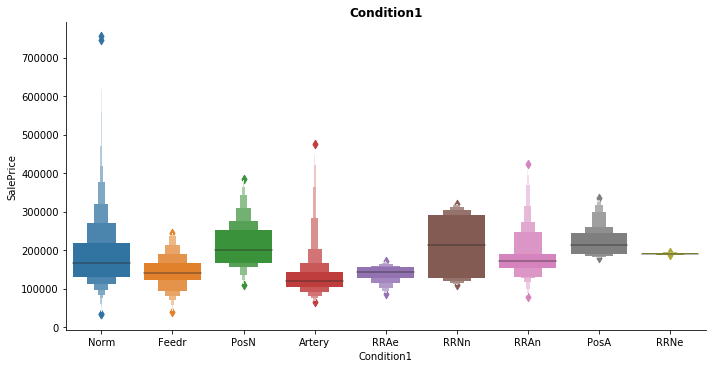

  Condition2      SalePrice
0     Artery  106500.000000
1      Feedr  121166.666667
2       Norm  181169.405536
3       PosA  325000.000000
4       PosN  284875.000000
5       RRAe  190000.000000
6       RRAn  136905.000000
7       RRNn   96750.000000 



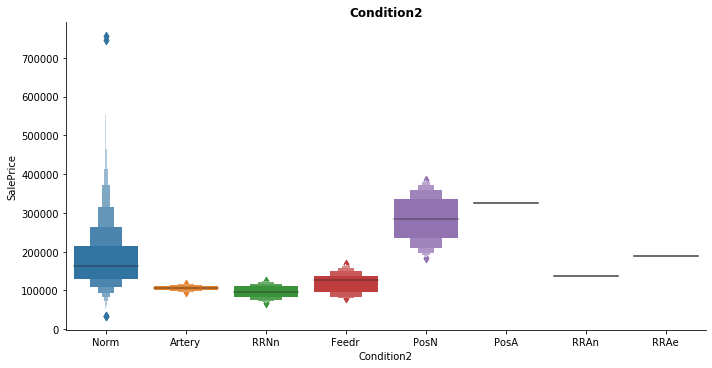

  HouseStyle      SalePrice
0     1.5Fin  143116.740260
1     1.5Unf  110150.000000
2     1Story  175985.477961
3     2.5Fin  220000.000000
4     2.5Unf  157354.545455
5     2Story  210051.764045
6     SFoyer  135074.486486
7       SLvl  166703.384615 



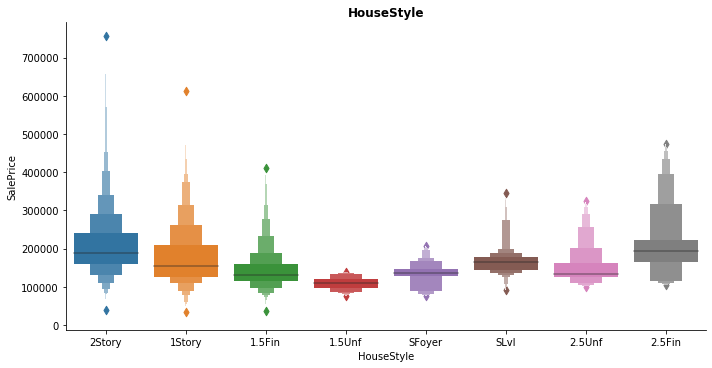

  ExterQual      SalePrice
0        Ex  367360.961538
1        Fa   87985.214286
2        Gd  231633.510246
3        TA  144341.313466 



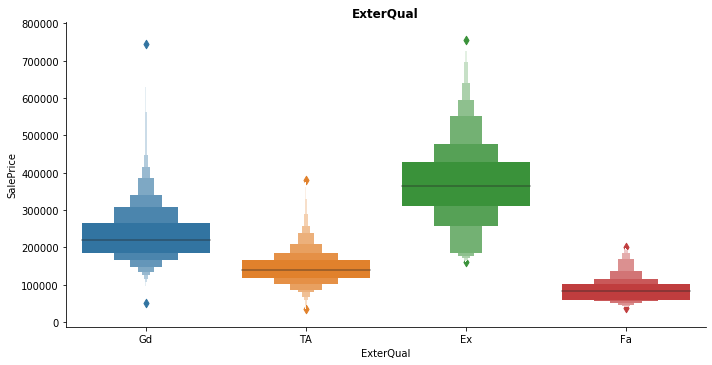

  BsmtQual      SalePrice
0       Ex  327041.041322
1       Fa  115692.028571
2       Gd  202688.478964
3     NoBS  105652.891892
4       TA  140759.818182 



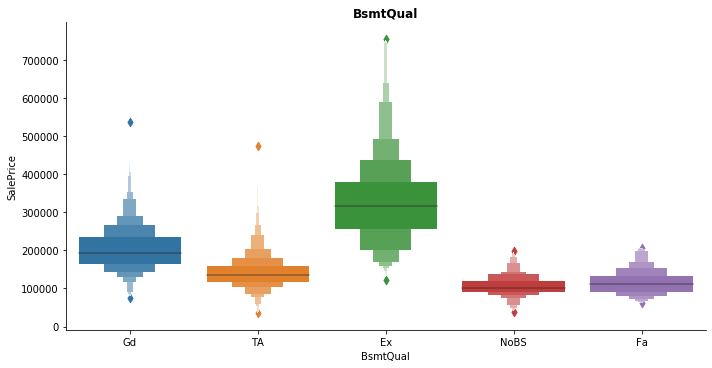

  BsmtCond      SalePrice
0       Fa  121809.533333
1       Gd  213599.907692
2     NoBS  105652.891892
3       Po   64000.000000
4       TA  183632.620900 



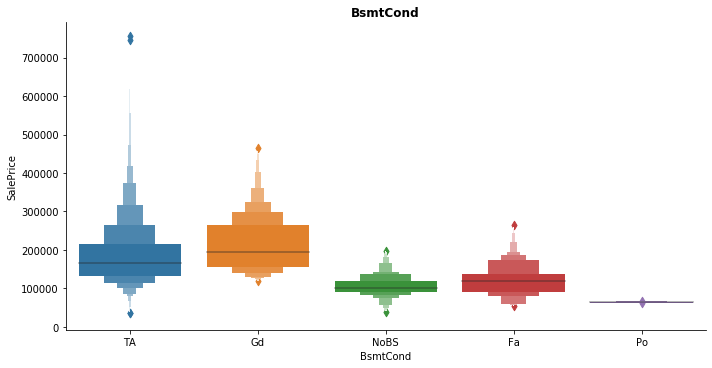

  KitchenQual      SalePrice
0          Ex  328554.670000
1          Fa  105565.205128
2          Gd  212116.023891
3          TA  139962.511565 



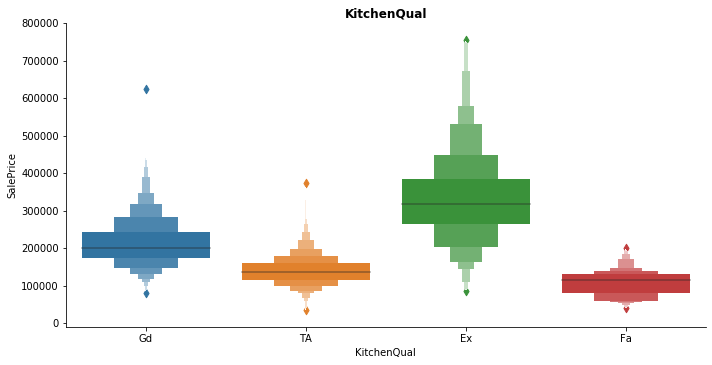

  GarageType      SalePrice
0     2Types  151283.333333
1     Attchd  202892.656322
2    Basment  160570.684211
3    BuiltIn  254751.738636
4    CarPort  109962.111111
5     Detchd  134091.162791
6       NoGR  103317.283951 



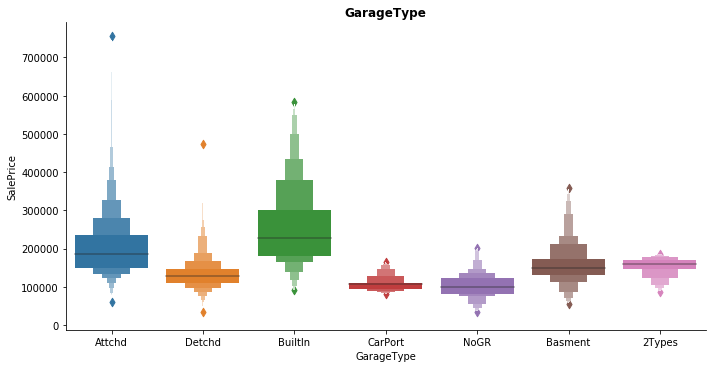

  GarageFinish      SalePrice
0          Fin  240052.690341
1         NoGR  103317.283951
2          RFn  202068.869668
3          Unf  142156.423140 



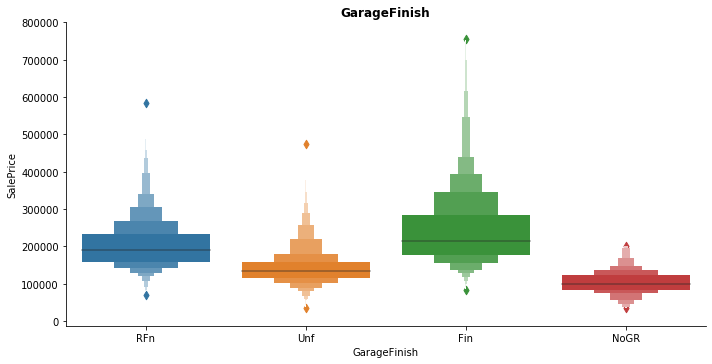

  PoolQC      SalePrice
0     Ex  490000.000000
1     Fa  215500.000000
2     Gd  201990.000000
3   NoPL  180404.663455 



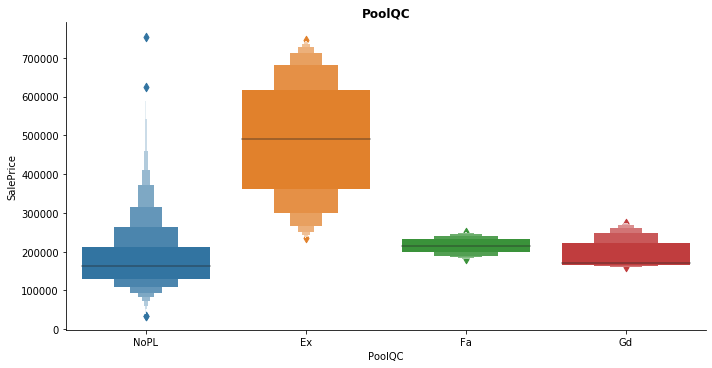

In [33]:
#OverallQual  GarageCars  FullBath  TotRmsAbvGrd  MSZoning  Neighborhood  Condition  HouseStyle  ExterQual  BsmtQual  
#BsmntCond  KitchenQual  GarageType  GarageFinish  PoolQC
#GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  YearBuilt  BsmtFinSF1  WoodDeckSF  2ndFlrSF  OpenPorchSF  LotArea  BsmtUnfSF

#Create df for group variables
pd.options.display.max_rows = 35
tmp_grp_list=['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','MSZoning','Neighborhood','Condition1','Condition2','HouseStyle','ExterQual','BsmtQual','BsmtCond','KitchenQual','GarageType','GarageFinish','PoolQC']
for clm in tmp_grp_list:
    print(df[[clm,'SalePrice']].groupby([clm],as_index=False).mean(),"\n")
    sns.catplot(x=clm, y='SalePrice', data=df, kind='boxen', aspect=2)
    plt.title(clm, weight='bold', fontsize=12)
    plt.show()

In [34]:
#calculate how garage parameter are impacting price.
    #GarageType: Garage location
       # 2Types	More than one type of garage
       # Attchd	Attached to home
       # Basment	Basement Garage
       # BuiltIn	Built-In (Garage part of house - typically has room above garage)
       # CarPort	Car Port
       # Detchd	Detached from home
       # NA	No Garage
    #GarageFinish: Interior finish of the garage
       # Fin	Finished
       # RFn	Rough Finished
       # Unf	Unfinished
       # NoGR	No GarageType

#tmp_grp_list=['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','MSZoning','Neighborhood','Condition1','Condition2','HouseStyle','ExterQual','BsmtQual','BsmtCond','KitchenQual','GarageType','GarageFinish','PoolQC']

tmp_grp_list=df[['GarageType','GarageFinish','GarageCars','SalePrice']].groupby(['GarageType','GarageFinish','GarageCars'],as_index=False).mean().sort_values(['SalePrice'])
print(tmp_grp_list)

   GarageType GarageFinish  GarageCars      SalePrice
33     Detchd          RFn           3   81000.000000
38       NoGR         NoGR           0  103317.283951
28    CarPort          Unf           2  105793.166667
25    BuiltIn          Unf           1  113250.000000
31     Detchd          RFn           1  113888.000000
..        ...          ...         ...            ...
10     Attchd          RFn           3  271744.087719
21    BuiltIn          Fin           3  343808.304348
6      Attchd          Fin           3  351984.191781
26    BuiltIn          Unf           3  381000.000000
24    BuiltIn          RFn           3  397675.500000

[39 rows x 4 columns]


So Builtin garage is more expensive.Also, finishing of the garage type and the number of rooms too impact the price of house

In [35]:
#calculate how basement parameter are impacting price.
    #BsmtQual: Evaluates the height of the basement
      #Ex	Excellent (100+ inches)	
      #Gd	Good (90-99 inches)
      #TA	Typical (80-89 inches)
      #Fa	Fair (70-79 inches)
      #Po	Poor (<70 inches
      #NoBS 	No Basement
    #BsmtCond: Evaluates the general condition of the basement
       #Ex	Excellent
       #Gd	Good
       #TA	Typical - slight dampness allowed
       #Fa	Fair - dampness or some cracking or settling
       #Po	Poor - Severe cracking, settling, or wetness
       #NoBS	No Basement
#tmp_grp_list=['OverallQual','FullBath','TotRmsAbvGrd','MSZoning','Neighborhood','Condition1','Condition2','HouseStyle','ExterQual','KitchenQual','PoolQC']

tmp_grp_list=df[['BsmtQual','BsmtCond','SalePrice']].groupby(['BsmtQual','BsmtCond'],as_index=False).mean().sort_values(['SalePrice'])
print(tmp_grp_list)


   BsmtQual BsmtCond      SalePrice
3        Fa       Po   64000.000000
8      NoBS     NoBS  105652.891892
2        Fa       Fa  110406.250000
9        TA       Fa  120947.971429
4        Fa       TA  121518.840000
11       TA       TA  140656.783557
5        Gd       Fa  182500.000000
10       TA       Gd  182694.444444
7        Gd       TA  202010.643103
6        Gd       Gd  214730.750000
0        Ex       Gd  260471.545455
1        Ex       TA  333697.990909


Good qualtiy with excellement condition of basement is expensive.

In [36]:
#Lets calculate external factoes.


#tmp_grp_list=['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','MSZoning','Neighborhood','Condition1','Condition2','HouseStyle','ExterQual','BsmtQual','BsmtCond','KitchenQual','GarageType','GarageFinish','PoolQC']

tmp_grp_list=df[['MSZoning','Condition1','Condition2','SalePrice']].groupby(['MSZoning','Condition1','Condition2'],as_index=False).mean().sort_values(['SalePrice'])
print(tmp_grp_list)

   MSZoning Condition1 Condition2      SalePrice
1   C (all)      Feedr       Norm   40000.000000
2   C (all)       Norm       Norm   77535.000000
0   C (all)      Feedr      Feedr   85000.000000
25       RM      Feedr       RRNn   96750.000000
5        RH     Artery       Norm  103600.000000
8        RL     Artery     Artery  106500.000000
27       RM       RRAe       Norm  108000.000000
24       RM      Feedr       Norm  109544.444444
28       RM       RRAn      Feedr  109750.000000
30       RM       RRNn       Norm  110000.000000
26       RM       Norm       Norm  125879.715084
29       RM       RRNn      Feedr  128000.000000
9        RL     Artery       Norm  130170.833333
7        RH       Norm       Norm  131277.833333
22       RM     Artery       Norm  135935.000000
12       RL      Feedr       RRAn  136905.000000
6        RH      Feedr       Norm  142000.000000
18       RL       RRAn      Feedr  147250.000000
17       RL       RRAe       Norm  149800.000000
10       RL      Fee

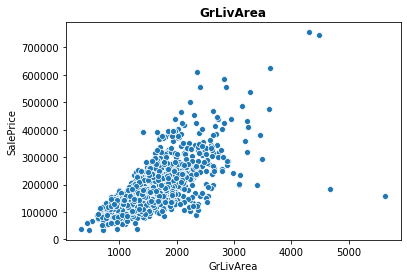

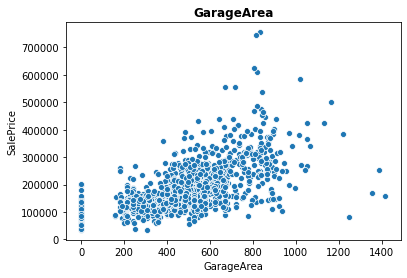

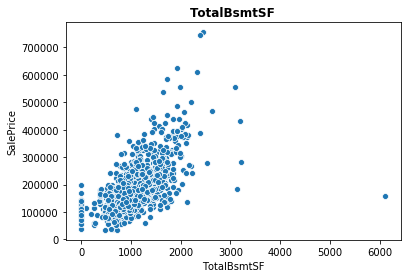

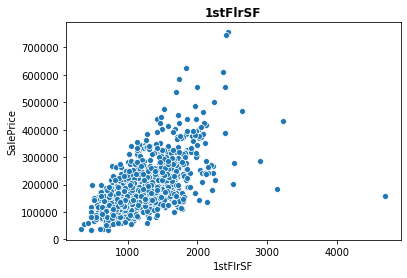

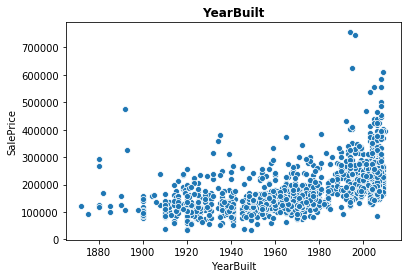

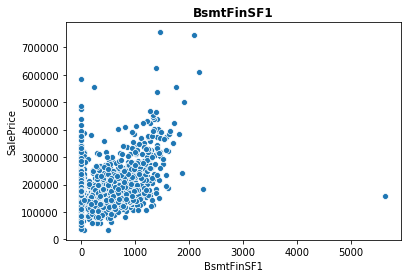

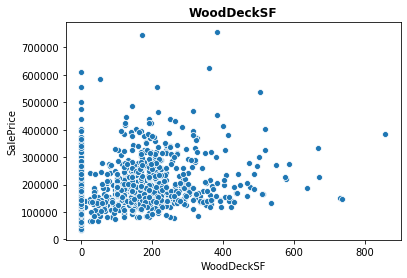

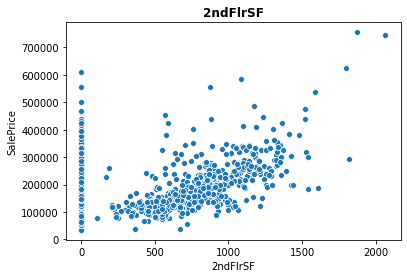

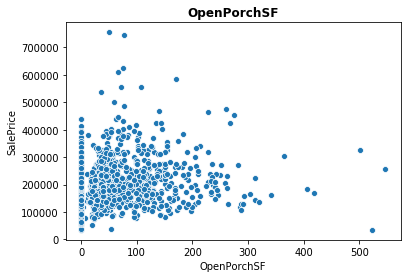

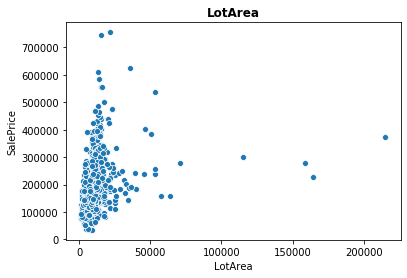

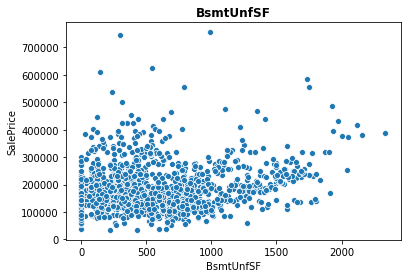

In [37]:
#Lets see the numerical value graph
pd.options.display.max_rows = 35
tmp_grp_list=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt','BsmtFinSF1','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea','BsmtUnfSF']
for clm in tmp_grp_list:
    #print(df[[clm,'SalePrice']].groupby([clm],as_index=False).mean(),"\n")
    sns.scatterplot(x=clm, y='SalePrice', data=df)
    plt.title(clm, weight='bold', fontsize=12)
    plt.show()

<h4>Create the linear regression object</h4>

71357.42140747685
[231.64561451]
The R-square is:  0.388666759031819
The mean square error of price and predicted value is:  3855549505.982716


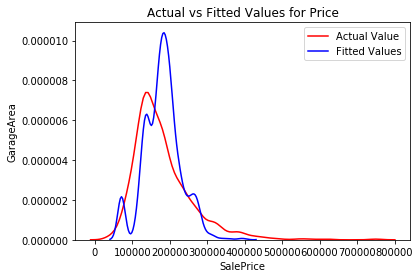

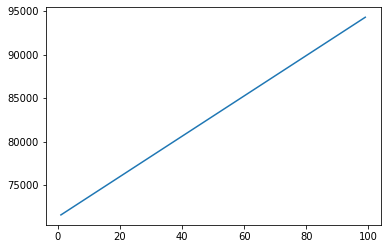

In [38]:
X = df[['GarageArea']]
Y = df['SalePrice']
lm.fit(X,Y)
Yhat=lm.predict(X)
#Yhat = a + b  X  (a=> intercept, b=> coefficient)
print(lm.intercept_)
print(lm.coef_)
print('The R-square is: ', lm.score(X, Y))
print('The mean square error of price and predicted value is: ', mean_squared_error(df['SalePrice'], Yhat))


#plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('SalePrice')
plt.ylabel('GarageArea')

plt.show()
plt.close()

new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat=lm.predict(new_input)
yhat[0:5]
plt.plot(new_input, yhat)
plt.show()

           3          2
-0.000437 x + 0.7723 x - 133.4 x + 1.113e+05


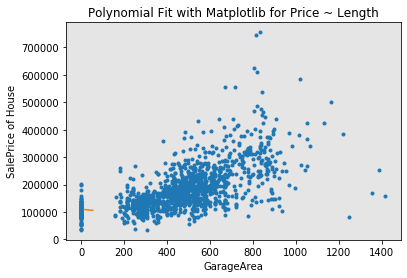

The R-square value is:  0.42502694292534227
MSE 3626233513.2418423


'\nfrom sklearn.preprocessing import PolynomialFeatures\npr=PolynomialFeatures(degree=2)\nZ_pr=pr.fit_transform(pr)\nprint(Z_pr.shape)\n'

In [39]:
#plynomial relation
X = df['GarageArea']
Y = df['SalePrice']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, X, Y, 'GarageArea')

from sklearn.metrics import r2_score
print('The R-square value is: ', r2_score(Y, p(X)))
print('MSE',mean_squared_error(df['SalePrice'], p(X)))
#print('The R-square is: ', lm.score(X, Y))
#print('The mean square error of price and predicted value is: ', mean_squared_error(df['SalePrice'], Yhat))
'''
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(pr)
print(Z_pr.shape)
'''


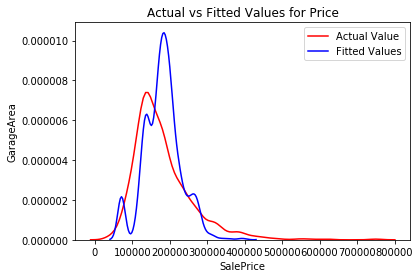

In [40]:
#plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('SalePrice')
plt.ylabel('GarageArea')

plt.show()
plt.close()

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

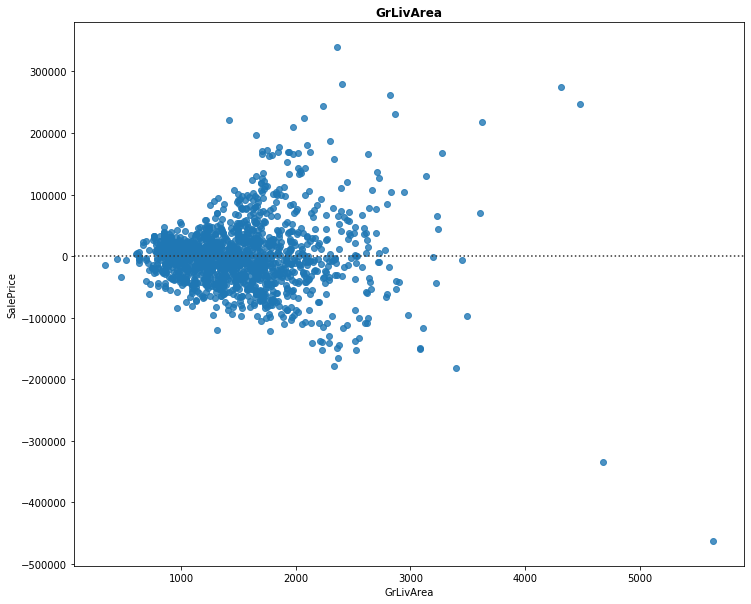

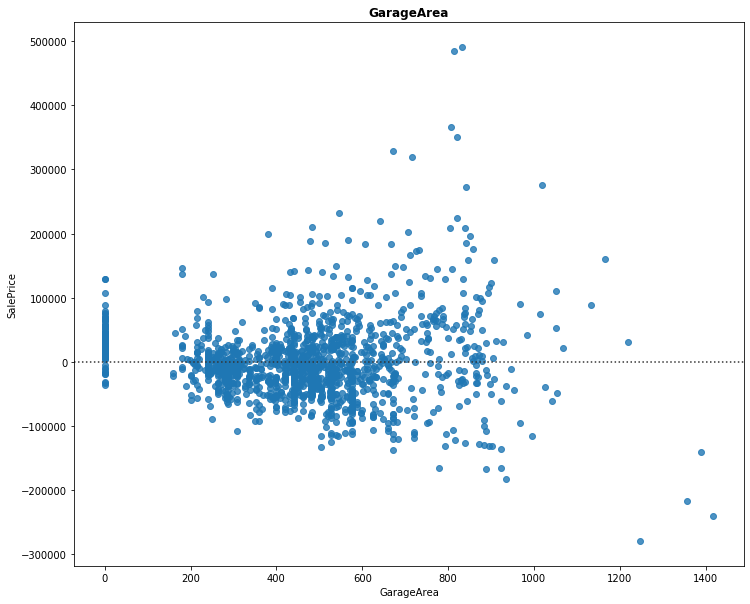

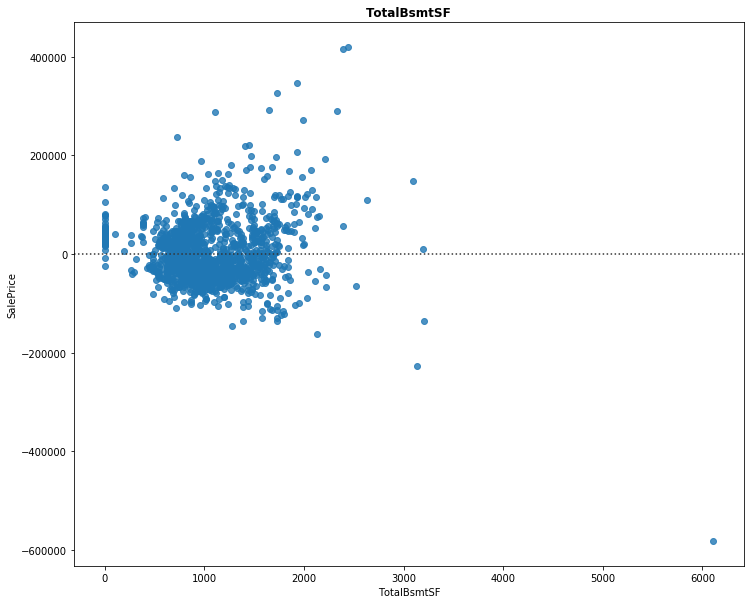

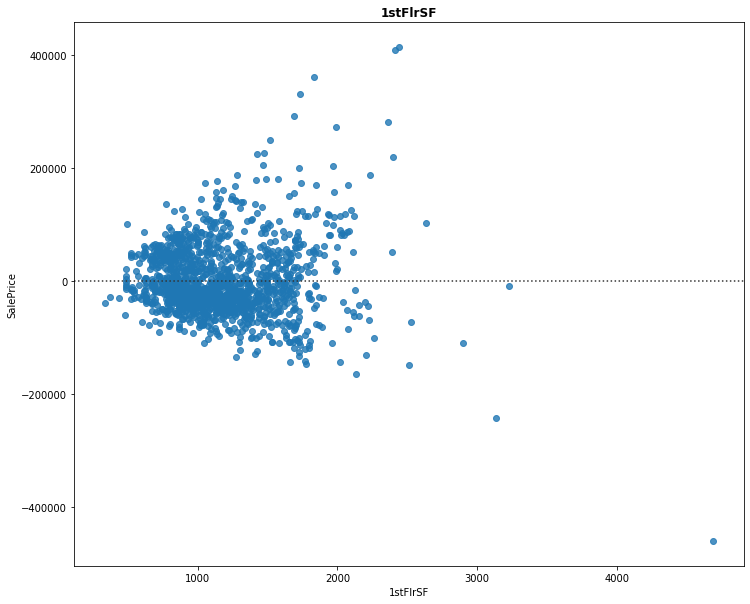

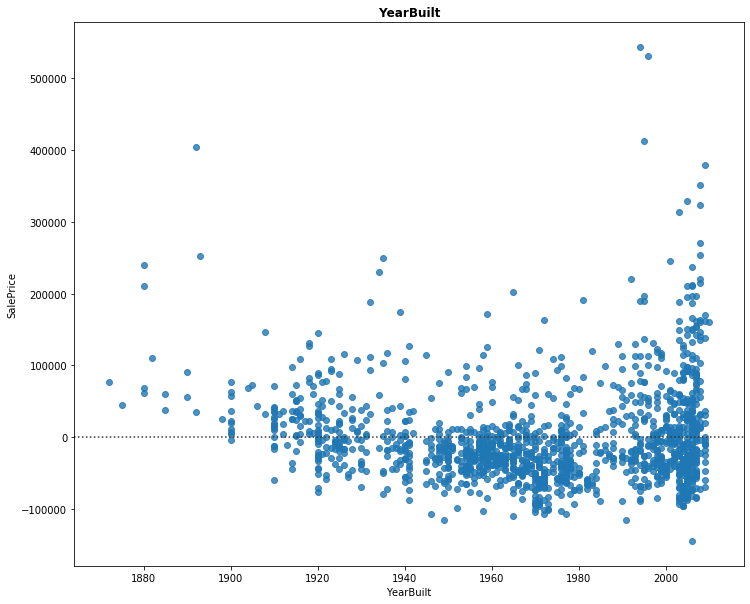

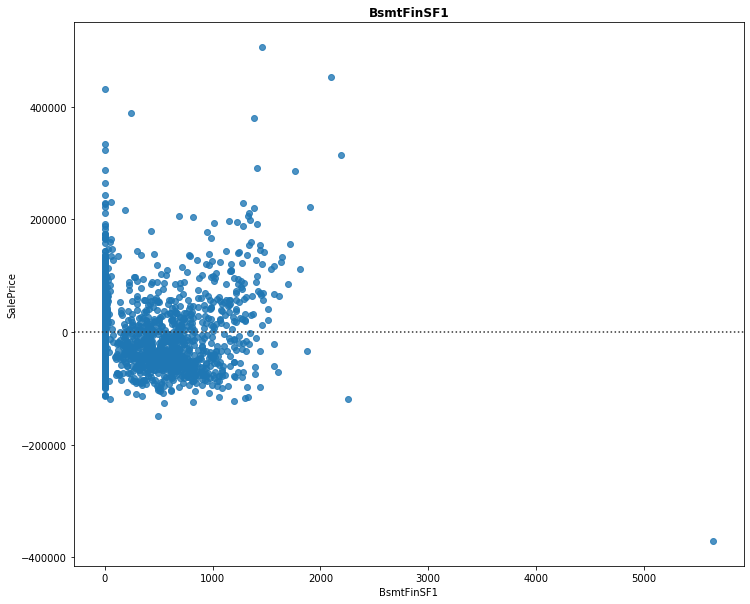

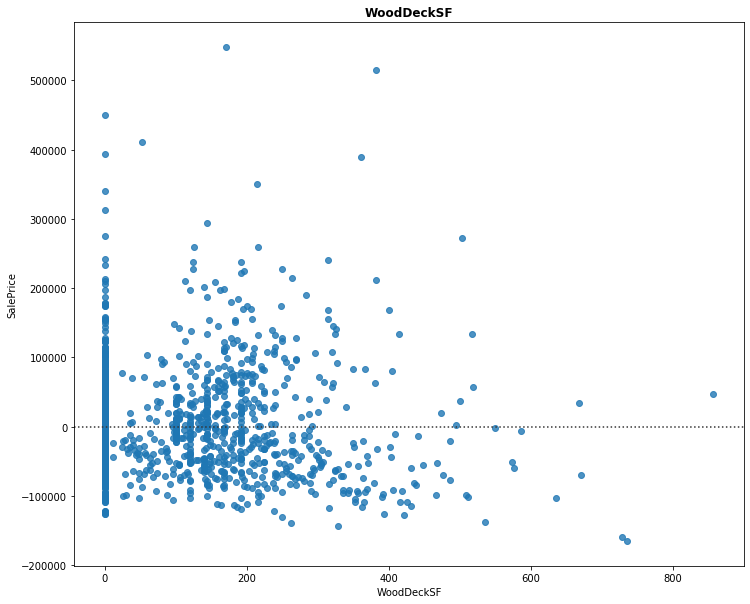

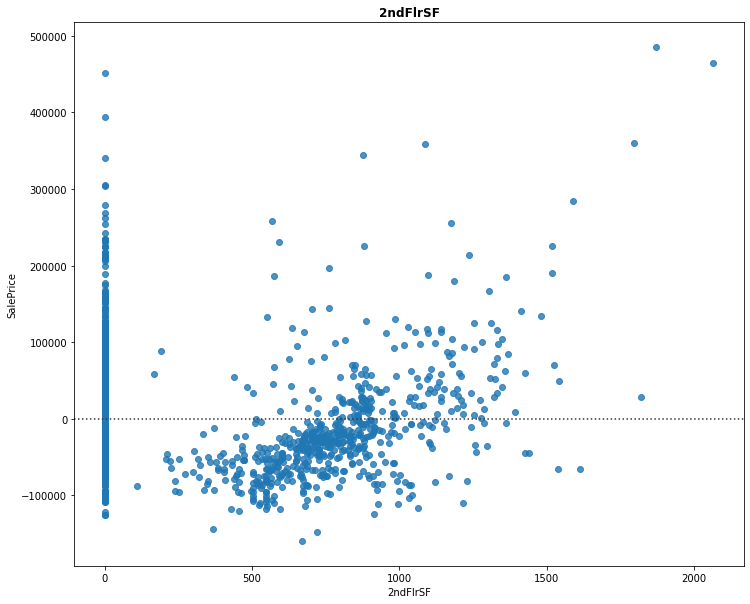

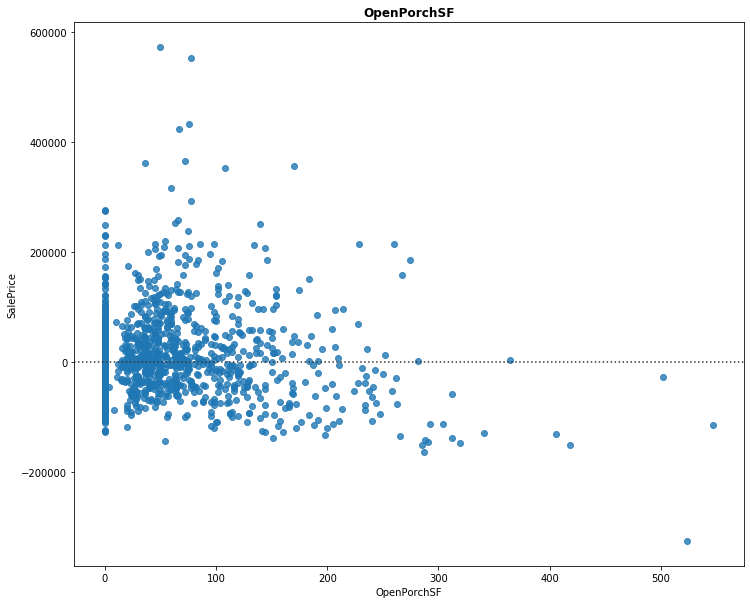

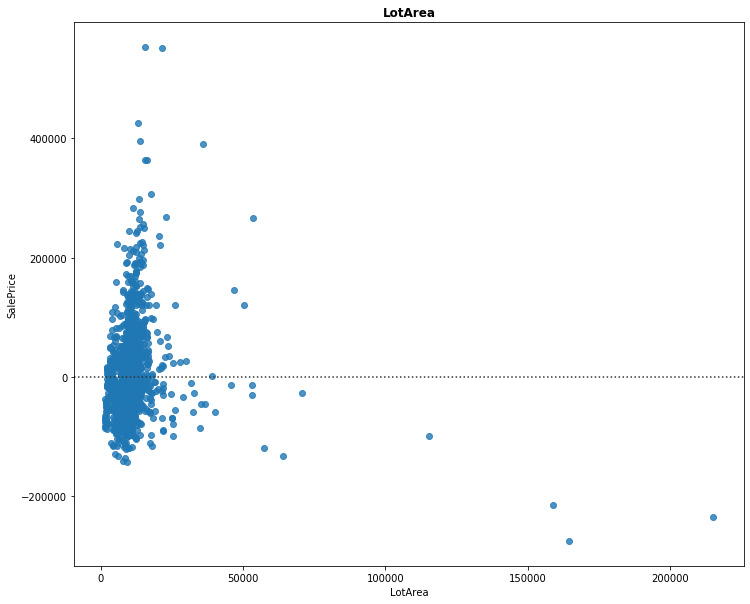

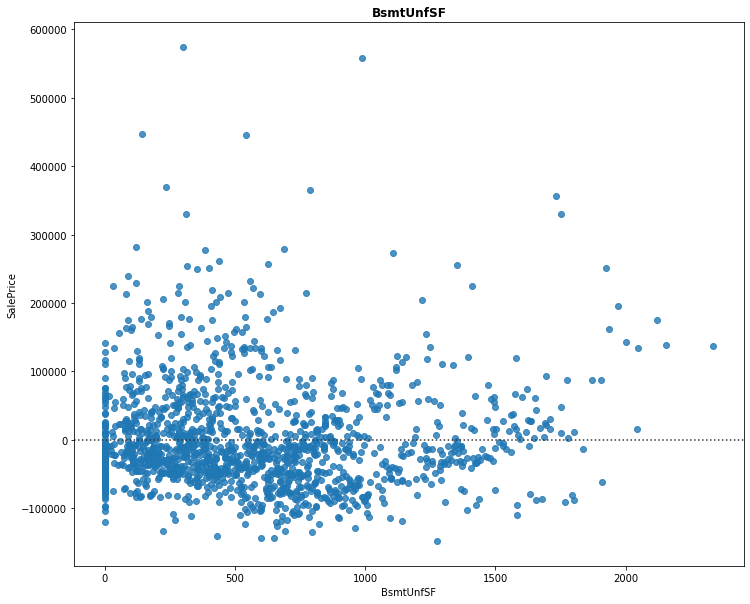

In [41]:
pd.options.display.max_rows = 35
#tmp_grp_list=['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','MSZoning','Neighborhood','Condition1','Condition2','HouseStyle','ExterQual','BsmtQual','BsmtCond','KitchenQual','GarageType','GarageFinish','PoolQC']
tmp_grp_list=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt','BsmtFinSF1','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea','BsmtUnfSF']

for clm in tmp_grp_list:
    #print(df[[clm,'SalePrice']].groupby([clm],as_index=False).mean(),"\n")
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    sns.residplot(df[clm],df['SalePrice'])
    plt.title(clm, weight='bold', fontsize=12)
    plt.show()

LM: GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,BsmtFinSF1,WoodDeckSF,OpenPorchSF,BsmtUnfSF
PM: 2ndFlrSF,LotArea

[214115.55248375 185382.05784592 220263.66958968 ... 203472.90382571
 121881.05396818 181964.05464051]
The mean square error:  1753926765.5300174
The R-square is:  0.721898595173398


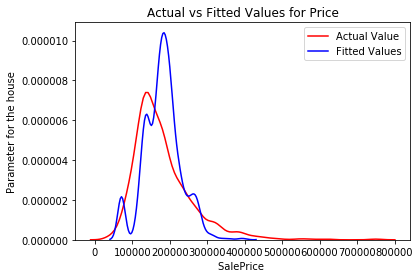

In [42]:
#Multiple Linear Regression
Z = df[['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt','BsmtFinSF1','WoodDeckSF','OpenPorchSF','BsmtUnfSF']]
lm.fit(Z, df['SalePrice'])
Y_hat = lm.predict(Z)
print(Y_hat)

print('The mean square error: ', mean_squared_error(df['SalePrice'],Y_hat))
print('The R-square is: ', lm.score(Z, df['SalePrice']))

ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('SalePrice ')
plt.ylabel('Parameter for the house')

plt.show()
plt.close()

In [43]:
y_data = df['SalePrice']
x_data=df.drop('SalePrice',axis=1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 584
number of training samples: 876


In [45]:
#lre.fit(x_train[['horsepower']], y_train)

https://corporatefinanceinstitute.com/resources/knowledge/other/kurtosis/

In [46]:
df['GarageFinish']

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [47]:
df.head(4)
df_selected_column=df[['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','MSZoning','Neighborhood','Condition1','Condition2','HouseStyle','ExterQual','BsmtQual','BsmtCond','KitchenQual','GarageType','GarageFinish','PoolQC','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt','BsmtFinSF1','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea','BsmtUnfSF','SalePrice']]
df_selected_column.head(3)

,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,MSZoning,Neighborhood,Condition1,Condition2,HouseStyle,ExterQual,BsmtQual,BsmtCond,KitchenQual,GarageType,GarageFinish,PoolQC,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea,BsmtUnfSF,SalePrice
0,7,2,2,8,RL,CollgCr,Norm,Norm,2Story,Gd,Gd,TA,Gd,Attchd,RFn,NoPL,1710,548,856,856,2003,706,0,854,61,8450,150,208500
1,6,2,2,6,RL,Veenker,Feedr,Norm,1Story,TA,Gd,TA,TA,Attchd,RFn,NoPL,1262,460,1262,1262,1976,978,298,0,0,9600,284,181500
2,7,2,2,6,RL,CollgCr,Norm,Norm,2Story,Gd,Gd,TA,Gd,Attchd,RFn,NoPL,1786,608,920,920,2001,486,0,866,42,11250,434,223500


In [48]:
df_selected_column.MSZoning =  df.MSZoning.map({'A':1, 'C':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 'RP':7, 'RM':8})
df_selected_column.Neighborhood =  df.Neighborhood.map({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4, 'ClearCr':5, 'CollgCr':6, 'Crawfor':7, 'Edwards':8,'Gilbert':9, 'IDOTRR':10, 'MeadowV':11,'Mitchel':12, 'Names':13, 'NoRidge':14,'NPkVill':15, 'NridgHt':16, 'NWAmes':17,'OldTown':18, 'SWISU':19, 'Sawyer':20,'SawyerW':21, 'Somerst':22, 'StoneBr':23,'Timber':24, 'Veenker':25})
df_selected_column.Condition1 = df.Condition1.map({'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9})
df_selected_column.Condition2 = df.Condition2.map({'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9})
df_selected_column.HouseStyle = df.HouseStyle.map({'1Story':1,'1.5Fin':2,'1.5Unf':3,'2Story':4,'2.5Fin':5,'2.5Unf':6,'SFoyer':7,'SLvl':8})
df_selected_column.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_selected_column.BsmtQual = df.BsmtQual.map({'NoBS':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_selected_column.BsmtCond =  df.BsmtCond.map({'NoBS':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_selected_column.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_selected_column.GarageType = df.GarageType.map({'2Types':1, 'Attchd':2, 'Basment':3, 'BuiltIn':4, 'CarPort':5,'Detchd':6,'NoGR':0})
df_selected_column.GarageFinish = df.GarageFinish.map({'NoGR':0, 'Fin':1, 'RFn':2,'Unf':3})
df_selected_column.PoolQC = df.PoolQC.map({'NoPL':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
# in case if we miss some NaN so replace it with 0
df_selected_column["MSZoning"].replace(np.nan,0,inplace=True) 
df_selected_column["Neighborhood"].replace(np.nan,0,inplace=True) 
df_selected_column["Condition1"].replace(np.nan,0,inplace=True) 
df_selected_column["Condition2"].replace(np.nan,0,inplace=True) 
df_selected_column["HouseStyle"].replace(np.nan,0,inplace=True) 
df_selected_column["ExterQual"].replace(np.nan,0,inplace=True) 
df_selected_column["BsmtQual"].replace(np.nan,0,inplace=True) 
df_selected_column["BsmtCond"].replace(np.nan,0,inplace=True) 
df_selected_column["KitchenQual"].replace(np.nan,0,inplace=True) 
df_selected_column["GarageType"].replace(np.nan,0,inplace=True) 
df_selected_column["GarageFinish"].replace(np.nan,0,inplace=True) 
df_selected_column["PoolQC"].replace(np.nan,0,inplace=True) 

'''
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df.Street = df.Street.map({'Grvl':1, 'Pave':2})
df.Utilities = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

'''

#df_selected_column.drop('SalePrice',axis=1)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


"\ndf.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})\ndf['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})\ndf['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})\ndf.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})\ndf.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})\ndf.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})\ndf.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})\ndf.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})\ndf.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})\ndf.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) \ndf.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})\ndf.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3

In [49]:
printnull(df_selected_column)
df_selected_column.head(3)
#df_selected_column['GarageFinish'].value_counts()

[]


,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,MSZoning,Neighborhood,Condition1,Condition2,HouseStyle,ExterQual,BsmtQual,BsmtCond,KitchenQual,GarageType,GarageFinish,PoolQC,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea,BsmtUnfSF,SalePrice
0,7,2,2,8,6.0,6.0,3,3,4,4,4,3,4,2,2,0,1710,548,856,856,2003,706,0,854,61,8450,150,208500
1,6,2,2,6,6.0,25.0,2,3,1,3,4,3,3,2,2,0,1262,460,1262,1262,1976,978,298,0,0,9600,284,181500
2,7,2,2,6,6.0,6.0,3,3,4,4,4,3,4,2,2,0,1786,608,920,920,2001,486,0,866,42,11250,434,223500


In [50]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

lets start modelling

Intercept: -177447.8670647136 Coefficient: [ 1.52962805e+04  1.02778162e+04 -4.80972941e+03  1.96781079e+03
 -9.22367006e+02  6.64505949e+01 -1.18515776e+03 -1.26725384e+04
 -1.60070270e+03  1.34401329e+04  9.00611142e+03 -4.36770184e+03
  1.23125585e+04  1.20120614e+02 -4.69076893e+03 -8.11674574e+03
  4.56704639e+00  1.44071429e+01  9.40415541e+00  5.07768273e+01
  4.72877664e+01  7.65938714e+00  2.48578113e+01  3.94832141e+01
 -4.90794823e+00  5.46651781e-01 -1.17518010e+01]


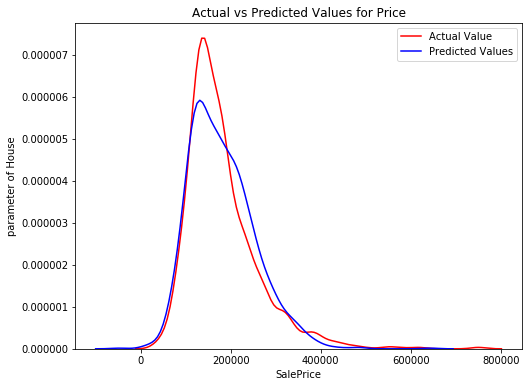

In [108]:
# Linear regression on all the selected column
tmplist =list(df_selected_column.columns.values)
tmplist.remove('SalePrice')
SelectedClmnForPred = df_selected_column[tmplist]
model1=lm.fit(SelectedClmnForPred, df_selected_column['SalePrice'])
print("Intercept:", lm.intercept_, "Coefficient:", lm.coef_)

Model_1 = lm.predict(SelectedClmnForPred)

plt.figure(figsize=(8, 6))
ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Model_1, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Predicted Values for Price')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')
plt.show()
plt.close()

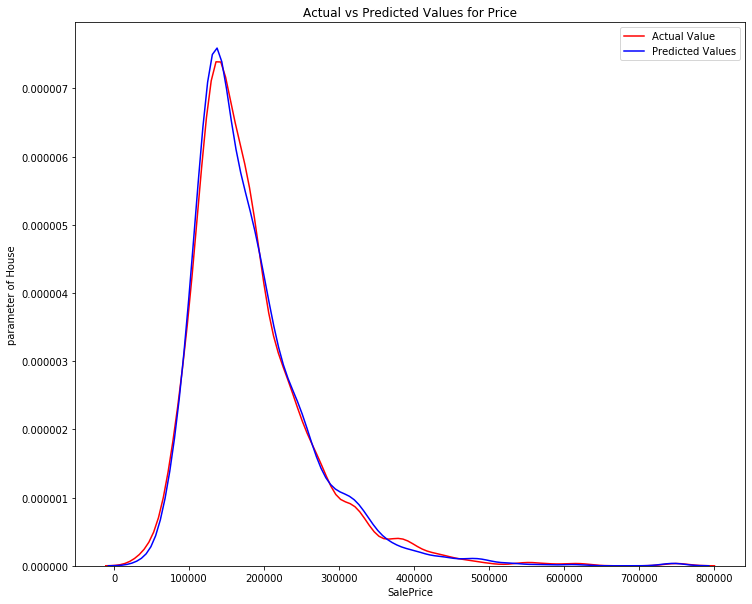

In [83]:
# Polynomial on all the selected column: Model2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),
       ('model',LinearRegression())]
pipe=Pipeline(Input)
model2=pipe.fit(SelectedClmnForPred,df_selected_column['SalePrice'])
Model_2=pipe.predict(SelectedClmnForPred)

plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Model_2, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values for Price')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')

plt.show()
plt.close()

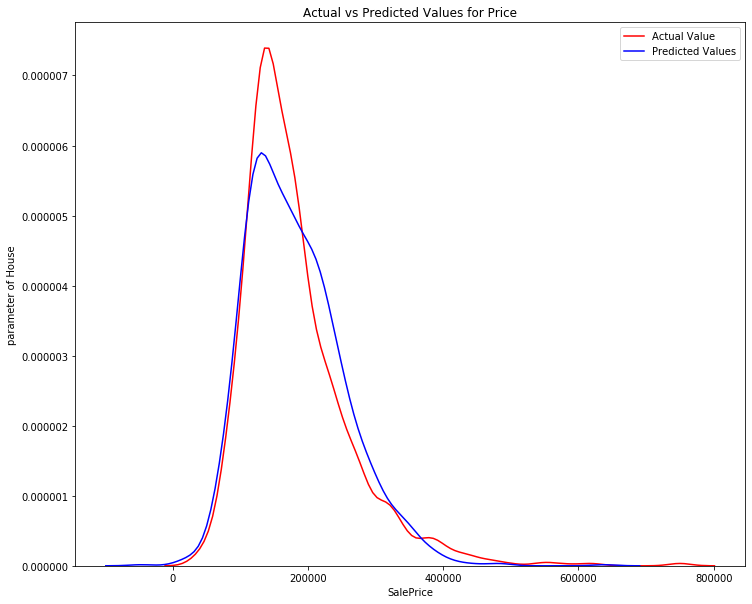

In [85]:
# OLS on all the selected column: Model3
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model3 = sm.OLS(df_selected_column['SalePrice'],SelectedClmnForPred,missing='drop').fit()
model_3=tmpmodel3.predict(SelectedClmnForPred) 

plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(model_3, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values for Price')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')

plt.show()
plt.close()


In [144]:
print('R square for moderl 1      ',model1.score(SelectedClmnForPred, df_selected_column['SalePrice']))
print('R square for moderl 2      ',model2.score(SelectedClmnForPred, df_selected_column['SalePrice']))
print('R square for moderl 3      ',model3.rsquared_adj,"\n")

print('Meansquare error model 1   ',mean_squared_error(df_selected_column['SalePrice'], Model_1))
print('Meansquare error model 2   ',mean_squared_error(df_selected_column['SalePrice'],Model_2))
print('Meansquare error model 3   ',mean_squared_error(df_selected_column['SalePrice'], model_3))

R square for moderl 1       0.8107358999745944
R square for moderl 2       0.9506978200249949
R square for moderl 3       0.9687864189878495 

Meansquare error model 1    1193648665.6566358
Meansquare error model 2    310938425.89919883
Meansquare error model 3    1196020417.6337137


In [ ]:
Training and Modelling

In [148]:
#An important step in testing your model is to split your data into training and testing data.
y_data = df_selected_column['SalePrice']
x_data=df_selected_column.drop('SalePrice',axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 438
number of training samples: 1022


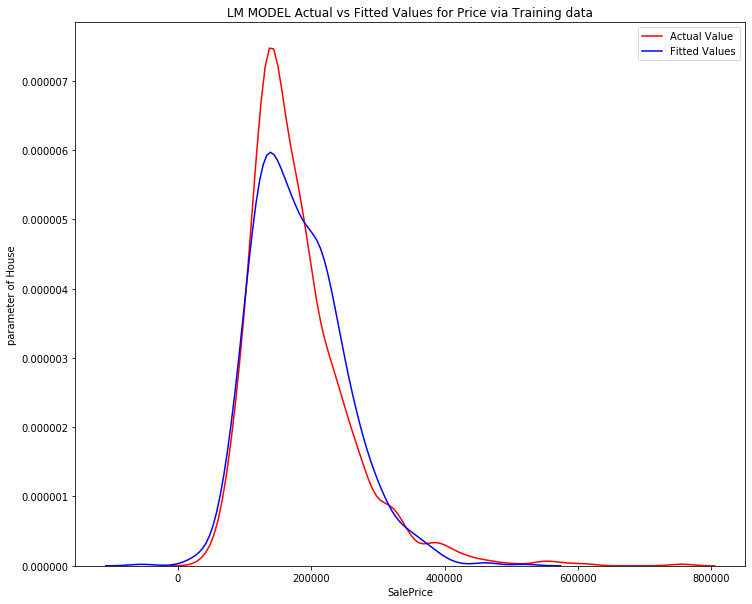

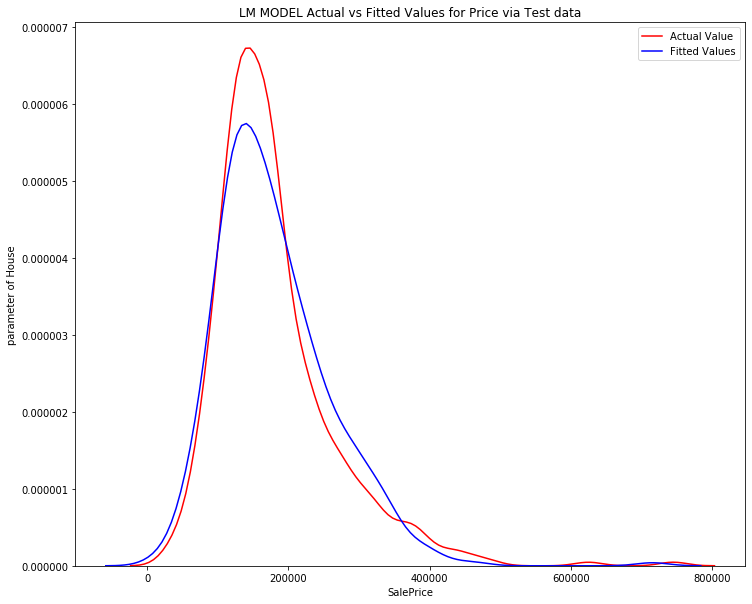

In [150]:
#Model 1 train and evaluate
lnmmdl = lm.fit(x_train, y_train)
lnmdl_predict = lm.predict(x_train)

plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(lnmdl_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('LM MODEL Actual vs Fitted Values for Price via Training data')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')

plt.show()
plt.close()


lnmmdl = lm.fit(x_test, y_test)
lnmdl_predict = lm.predict(x_test)

plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lnmdl_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('LM MODEL Actual vs Fitted Values for Price via Test data')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')

plt.show()
plt.close()

The mean of the folds are 5.315696391847946e+31 and the standard deviation is 9.2070562282912e+31
The mean of the folds are -9.167364148451765e+21 and the standard deviation is 1.5878340476603852e+22
[211940.3125     167381.1875     214583.1875     ... 240259.80148593
 233193.88948424 141340.52566814]
[161799.3667216  258767.03553218 124916.76545971 ... 131000.26464563
 100193.56160096  76402.03933202]


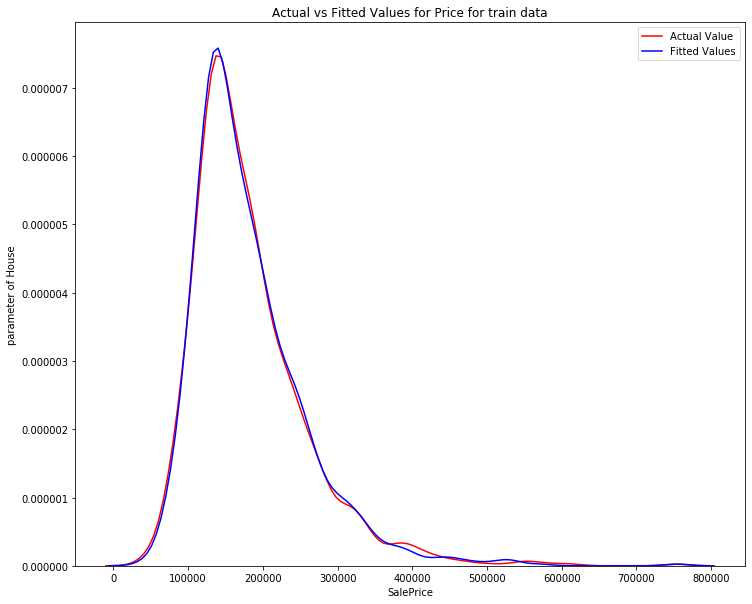

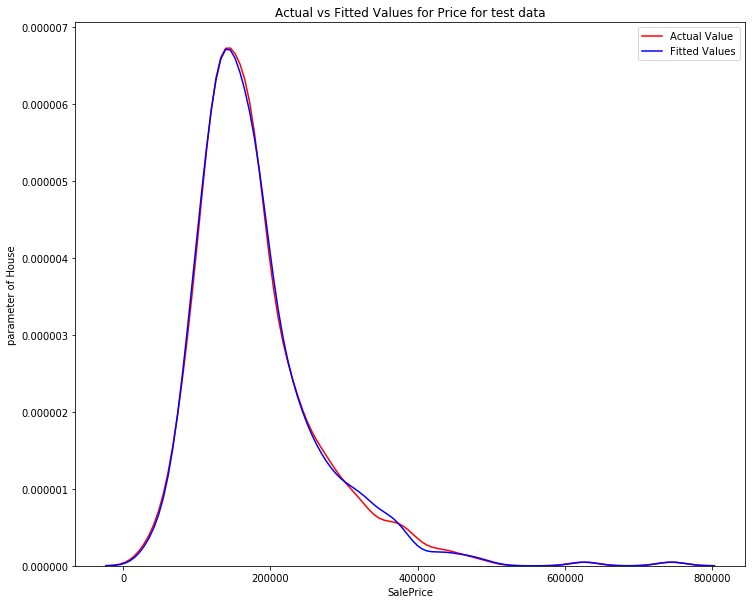

In [149]:
#Model 2 train and evaluate
from sklearn.model_selection import cross_val_score
Rcross = -1 * cross_val_score(pipe, x_data, y_data, cv=4,scoring='neg_mean_squared_error')
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
Rcross = cross_val_score(pipe, x_data, y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(pipe,x_data, y_data,cv=4)

print(yhat)

#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)
tmpmodel2 =pipe.fit(x_train,y_train)
Model_2=pipe.predict(x_train)

print(Model_2)
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Model_2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price for train data')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')

plt.show()
plt.close()


pipe=Pipeline(Input)
tmpmodel2 =pipe.fit(x_test,y_test)
Model_2=pipe.predict(x_test)

#print(Model_2)
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Model_2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price for test data')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')

plt.show()
plt.close()


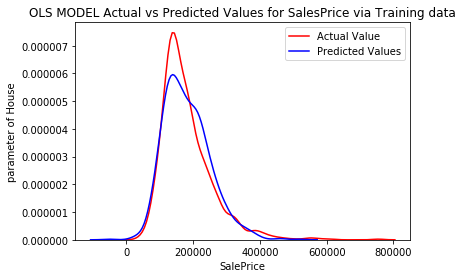

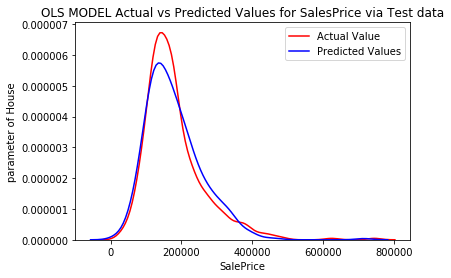

In [175]:
#Model 3 train and evaluate
lnmmdl = sm.OLS(y_train,x_train,missing='drop').fit()
lnmdl_predict = lnmmdl.predict(x_train)
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(lnmdl_predict, hist=False, color="b", label="Predicted Values" ,  ax = ax1)
plt.title('OLS MODEL Actual vs Predicted Values for SalesPrice via Training data')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')
plt.show()
lnmmdl = sm.OLS(y_test,x_test,missing='drop').fit()
lnmdl_predict = lnmmdl.predict(x_test)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lnmdl_predict, hist=False, color="b", label="Predicted Values" , ax = ax1)
plt.title('OLS MODEL Actual vs Predicted Values for SalesPrice via Test data')
plt.xlabel('SalePrice')
plt.ylabel('parameter of House')
plt.show()

In [60]:
test_submission=pd.read_csv(r'C:\Users\user\Desktop\arvind\Machine learning\Kaggle\house-prices-advanced-regression-techniques\test.csv')
df_selected_column_test=test_submission[['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','MSZoning',
                                         'Neighborhood','Condition1','Condition2','HouseStyle','ExterQual',
                                         'BsmtQual','BsmtCond','KitchenQual','GarageType','GarageFinish',
                                         'PoolQC','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt',
                                         'BsmtFinSF1','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea','BsmtUnfSF']]

df_selected_column_test["BsmtQual"].replace(np.nan,'NoBS',inplace=True)  
df_selected_column_test["BsmtCond"].replace(np.nan,'NoBS',inplace=True)  
df_selected_column_test["GarageType"].replace(np.nan,'NoGR',inplace=True)  
df_selected_column_test["GarageFinish"].replace(np.nan,'NoGR',inplace=True)  
df_selected_column_test["PoolQC"].replace(np.nan,'NoPL',inplace=True)  

df_selected_column_test["GarageCars"].replace(np.nan,0,inplace=True)
df_selected_column_test["GarageArea"].replace(np.nan,0,inplace=True)
df_selected_column_test["TotalBsmtSF"].replace(np.nan,0,inplace=True)
df_selected_column_test["BsmtFinSF1"].replace(np.nan,0,inplace=True)
df_selected_column_test["BsmtUnfSF"].replace(np.nan,0,inplace=True)


df_selected_column_test.MSZoning =  df_selected_column_test.MSZoning.map({'A':1, 'C':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 'RP':7, 'RM':8})
df_selected_column_test.Neighborhood =  df_selected_column_test.Neighborhood.map({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4, 'ClearCr':5, 'CollgCr':6, 'Crawfor':7, 'Edwards':8,'Gilbert':9, 'IDOTRR':10, 'MeadowV':11,'Mitchel':12, 'Names':13, 'NoRidge':14,'NPkVill':15, 'NridgHt':16, 'NWAmes':17,'OldTown':18, 'SWISU':19, 'Sawyer':20,'SawyerW':21, 'Somerst':22, 'StoneBr':23,'Timber':24, 'Veenker':25})
df_selected_column_test.Condition1 = df_selected_column_test.Condition1.map({'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9})
df_selected_column_test.Condition2 = df_selected_column_test.Condition2.map({'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9})
df_selected_column_test.HouseStyle = df_selected_column_test.HouseStyle.map({'1Story':1,'1.5Fin':2,'1.5Unf':3,'2Story':4,'2.5Fin':5,'2.5Unf':6,'SFoyer':7,'SLvl':8})
df_selected_column_test.ExterQual = df_selected_column_test.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_selected_column_test.BsmtQual = df_selected_column_test.BsmtQual.map({'NoBS':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_selected_column_test.BsmtCond =  df_selected_column_test.BsmtCond.map({'NoBS':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_selected_column_test.KitchenQual = df_selected_column_test.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_selected_column_test.GarageType = df_selected_column_test.GarageType.map({'2Types':1, 'Attchd':2, 'Basment':3, 'BuiltIn':4, 'CarPort':5,'Detchd':6,'NoGR':0})
df_selected_column_test.GarageFinish = df_selected_column_test.GarageFinish.map({'NoGR':0, 'Fin':1, 'RFn':2,'Unf':3})
df_selected_column_test.PoolQC = df_selected_column_test.PoolQC.map({'NoPL':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
# in case if we miss some NaN so replace it with 0
df_selected_column_test["MSZoning"].replace(np.nan,0,inplace=True) 
df_selected_column_test["Neighborhood"].replace(np.nan,0,inplace=True) 
df_selected_column_test["Condition1"].replace(np.nan,0,inplace=True) 
df_selected_column_test["Condition2"].replace(np.nan,0,inplace=True) 
df_selected_column_test["HouseStyle"].replace(np.nan,0,inplace=True) 
df_selected_column_test["ExterQual"].replace(np.nan,0,inplace=True) 
df_selected_column_test["BsmtQual"].replace(np.nan,0,inplace=True) 
df_selected_column_test["BsmtCond"].replace(np.nan,0,inplace=True) 
df_selected_column_test["KitchenQual"].replace(np.nan,0,inplace=True) 
df_selected_column_test["GarageType"].replace(np.nan,0,inplace=True) 
df_selected_column_test["GarageFinish"].replace(np.nan,0,inplace=True) 
df_selected_column_test["PoolQC"].replace(np.nan,0,inplace=True) 
df_selected_column_test.head(3)
printnull(df_selected_column_test)

[]


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [178]:
final_model_3=tmpmodel3.predict(df_selected_column_test)
my_submission = pd.DataFrame({'Id': test_submission.Id, 'SalePrice': final_model_3})
print(my_submission.head(10))
my_submission.to_csv(r'submission3.csv')

     Id      SalePrice
0  1461  116957.623937
1  1462  175415.895153
2  1463  173275.738803
3  1464  189778.457029
4  1465  212588.648335
5  1466  170499.183570
6  1467  182833.615334
7  1468  156851.899117
8  1469  200166.060070
9  1470  120799.511741


In [ ]:
my_submission.to_csv(r'C:\Users\user\Desktop\arvind\Machine learning\Kaggle\house-prices-advanced-regression-techniques\submission3.csv')